In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = np.array([[1960, 10.32, 0.0],
             [1964, 10.06, 0.07692308],
             [1968, 9.95, 0.15384615],
             [1972, 10.14, 0.23076923],
             [1976, 10.06, 0.30769231],
             [1980, 10.25, 0.38461538],
             [1984, 9.99, 0.46153846],
             [1988, 9.92, 0.53846154],
             [1992, 9.96, 0.61538462],
             [1996, 9.84, 0.69230769],
             [2000, 9.87, 0.76923077],
             [2004, 9.85, 0.84615385],
             [2008, 9.69, 0.92307692],
             [2012, 9.63, 1.0]]
)

In [78]:

# create the X matrix for the 2 feature model
X_2 = np.column_stack((np.ones(len(X)),X[:,2]))
# create the X matrix for the 3 feature model
X_3 = np.column_stack((np.ones(len(X)),X[:,2],np.square(X[:,2])))
# y values
y = X[:,1]
# solve 2 feature model
alpha = np.linalg.solve(np.transpose(X_2)@X_2,np.transpose(X_2) @ y)
# solve 3 feature model
beta = np.linalg.solve(np.transpose(X_3)@X_3,np.transpose(X_3) @ y)
# create a function to compute prediction for 2 feature model
f_2 = lambda x : alpha[0] + alpha[1]*x
# create a function to compute prediction for 3 feature model
f_3 = lambda x : beta[0] + beta[1]*x + beta[2]*x**2

In [80]:
alpha

array([10.22171429, -0.51057143])

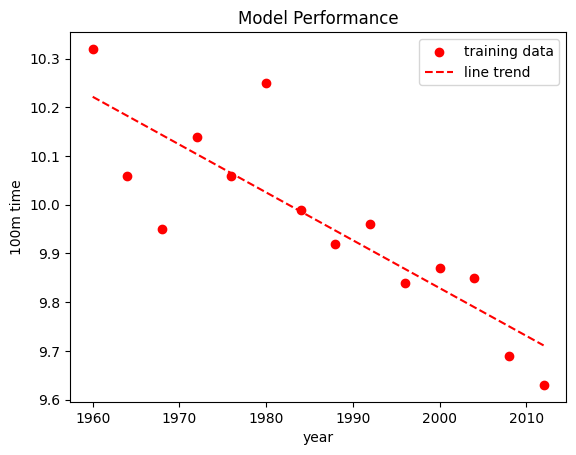

In [108]:
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], facecolor='red',edgecolors='red',label = 'training data')
ax.plot(X[:,0],f_2(X[:,2]),'red',linestyle='dashed',label = 'line trend')
ax.set_ylabel('100m time')
ax.set_xlabel('year')
ax.set_title('Model Performance')
plt.legend()

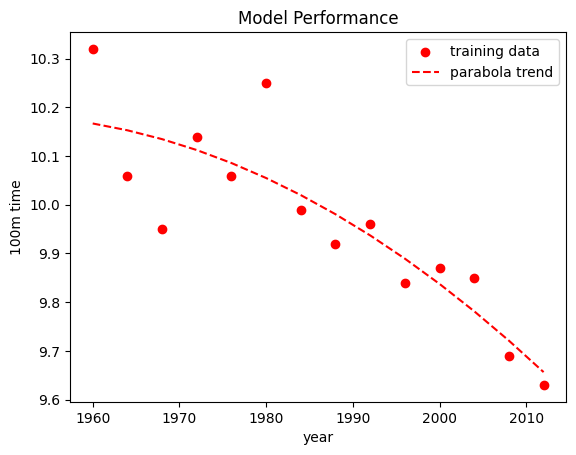

In [109]:
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], facecolor='red',edgecolors='red',label = 'training data')
ax.plot(X[:,0],f_3(X[:,2]),'red',linestyle='dashed',label = 'parabola trend')
ax.set_ylabel('100m time')
ax.set_xlabel('year')
ax.set_ylabel('100m time')
ax.set_xlabel('year')
ax.set_title('Model Performance')
plt.legend()

## part c

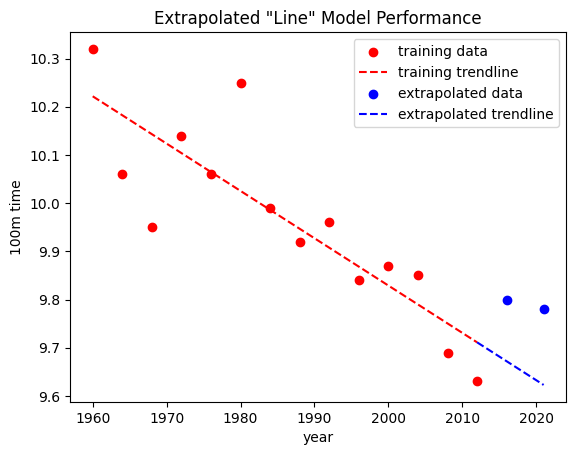

In [112]:
fig,ax = plt.subplots()
ext_x = np.array([2016,2021])
ext_x_ind = (ext_x - 1960)/52
ext_y_trend = f_2(ext_x_ind)
ext_y_actual = np.array([9.80,9.78])
ax.scatter(X[:,0],X[:,1], facecolor='red',edgecolors='red',label = 'training data')
ax.plot(X[:,0],f_2(X[:,2]),'red',linestyle='dashed',label = 'training trendline')
ax.scatter(ext_x,ext_y_actual, facecolor='blue',edgecolors='blue', label = 'extrapolated data')
ax.plot(np.concatenate(([2012],ext_x)),np.concatenate(([f_2(X[-1,2])],ext_y_trend)),'blue',linestyle='dashed',label = 'extrapolated trendline')

ax.set_ylabel('100m time')
ax.set_xlabel('year')
ax.set_ylabel('100m time')
ax.set_xlabel('year')
ax.set_title('Extrapolated "Line" Model Performance')
plt.legend()

In [90]:
x = np.mean(np.abs(ext_y_trend - ext_y_actual))
x

0.142678571246023

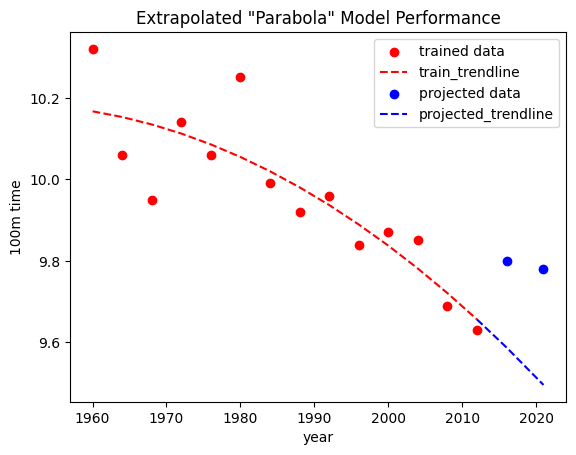

In [113]:
fig,ax = plt.subplots()
ext_x = np.array([2016,2021])
ext_x_ind = (ext_x - 1960)/52
ext_y_trend = f_3(ext_x_ind)
ext_y_actual = np.array([9.80,9.78])
ax.scatter(X[:,0],X[:,1], facecolor='red',edgecolors='red',label = 'trained data')
ax.plot(X[:,0],f_3(X[:,2]),'red',linestyle='dashed',label = 'train_trendline')
ax.scatter(ext_x, ext_y_actual, facecolor='blue',edgecolors='blue', label = 'projected data')
ax.plot(np.concatenate(([2012],ext_x)),np.concatenate(([f_3(X[-1,2])],ext_y_trend)),'blue',linestyle='dashed',label = 'projected_trendline')
ax.set_ylabel('100m time')
ax.set_xlabel('year')
ax.set_ylabel('100m time')
ax.set_xlabel('year')
ax.set_title('Extrapolated "Parabola" Model Performance')

plt.legend()

In [87]:
x = np.mean(np.abs(ext_y_trend - ext_y_actual))
x

0.24843385056664857